# CS 1656 – Introduction to Data Science (Fall 2023) 

## Instructors: Alexandros Labrinidis, Xiaowei Jia
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Zi Han Ding

## Term Project 

**Released: November 1, 2023**

**Due: December 8, 2023**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [251]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors



# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [252]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

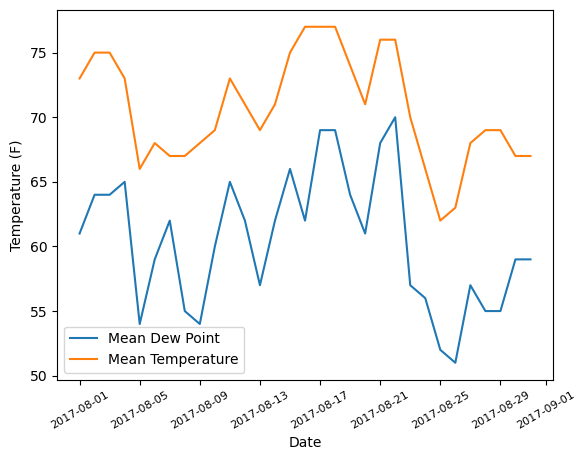

In [253]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [254]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])

### Task 1.1

In [255]:
trips = calculations.get_trips()
trips.head(5)

,Bikeid,Starttime,From station id,To station id,day,rebalCNT
0,70782,2021-01-12 12:48:00,49641.0,1061.0,01/12/2021,0
1,70578,2021-01-13 09:32:00,49391.0,1064.0,01/13/2021,0
2,70935,2021-01-15 17:43:00,1072.0,1072.0,01/15/2021,0
3,70910,2021-01-20 16:00:00,1068.0,1032.0,01/20/2021,0
4,70910,2021-01-24 14:40:00,1032.0,1056.0,01/24/2021,1


### Task 1.1

In [256]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,1,1,1
1,01/01/2021,1010,1,0,1
2,01/01/2021,1017,0,2,0
3,01/01/2021,1024,1,1,1
4,01/01/2021,1028,1,1,1
5,01/01/2021,1032,1,0,1
6,01/01/2021,1039,0,1,0
7,01/01/2021,1059,1,1,1
8,01/01/2021,1062,2,2,2
9,01/01/2021,1094,2,0,2


### Task 1.2

In [257]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,23,29,19
1,01/2021,1001,18,27,11
2,01/2021,1002,27,27,20
3,01/2021,1003,2,1,2
4,01/2021,1004,20,16,17
5,01/2021,1005,6,3,6
6,01/2021,1006,8,8,8
7,01/2021,1007,9,7,7
8,01/2021,1009,8,3,7
9,01/2021,1010,47,30,39


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [199]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046

# Read in data
df1 = pd.read_csv('HealthyRideRentals2021-Q1.csv')
df2 = pd.read_csv('HealthyRideRentals2021-Q2.csv')
df3 = pd.read_csv('HealthyRideRentals2021-Q3.csv')

# Putting Data into one
df = pd.concat([df1, df2, df3], ignore_index=True)


### Task 2.1

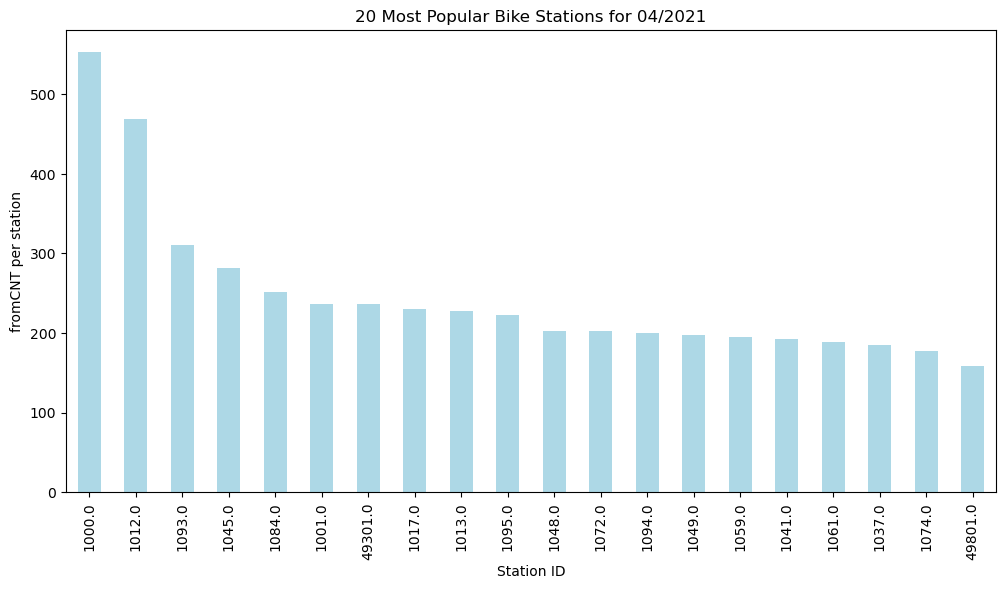

In [200]:
# Select Starttime and From station id from data
pop = df[['Starttime', 'From station id']].copy()

# Rename columns
pop.columns = ['Date', 'Station ID']

# Convert the Date column to datetime format
pop['Date'] = pd.to_datetime(pop['Date'])

# Extract the month and year
pop['Month'] = pop['Date'].dt.strftime('%m/%Y')


# Filter the data to include only entries for a specific month
filtered_data = pop[pop['Month'] == filter_month]

# Select the top 20 most frequent stations
top = filtered_data['Station ID'].value_counts().nlargest(20)

# Top 20 most popular bike stations
plt.figure(figsize=(12, 6))
top.plot(kind='bar', color='lightblue')


# Plot and label 
plt.title(f"20 Most Popular Bike Stations for {filter_month}")
plt.xlabel('Station ID')
plt.ylabel('fromCNT per station')
plt.show()



### Task 2.2

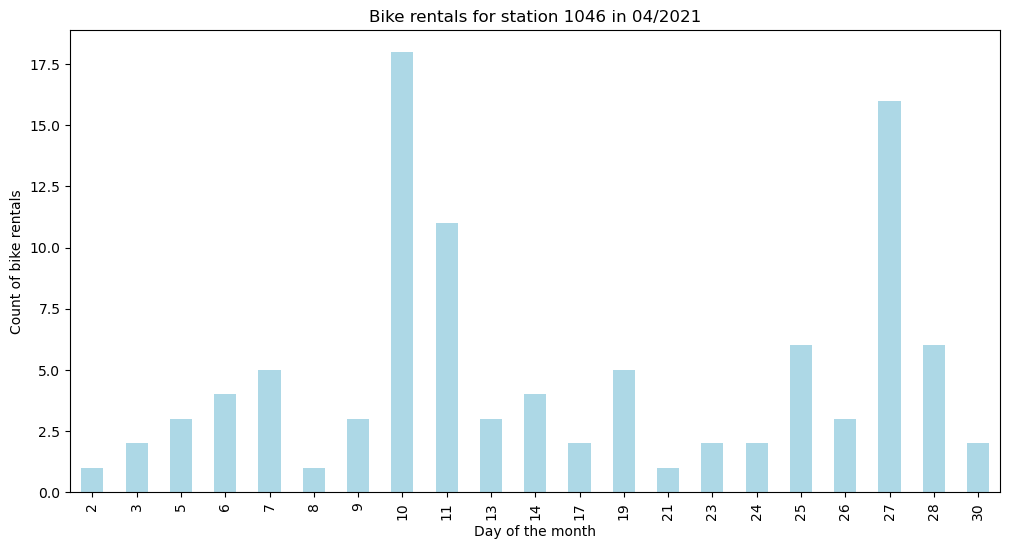

In [243]:
# Convert the Starttime column to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Filter the data for the specified month and station ID
filtered_data_station = df[(df['Starttime'].dt.strftime('%m/%Y') == filter_month) & (df['From station id'] == filter_stationID)]

# Group the data by the day of the month and count
mc = filtered_data_station['Starttime'].dt.day.value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(12, 6))
mc.plot(kind='bar', color='lightblue')
plt.title(f"Bike rentals for station {filter_stationID} in {filter_month}")
plt.xlabel('Day of the month')
plt.ylabel('Count of bike rentals')
plt.show()


### Task 2.3

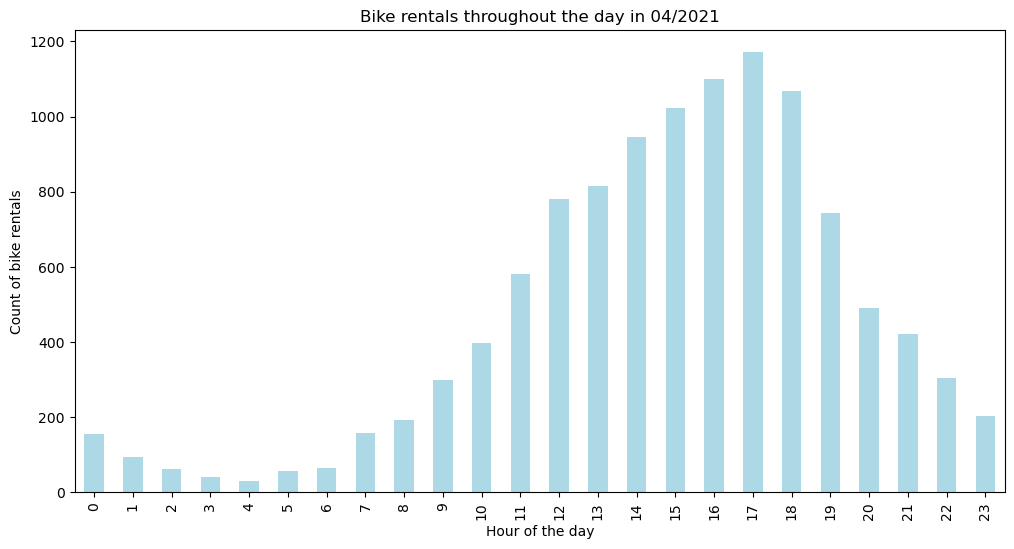

In [202]:
# Convert the Starttime column to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Filter the data 
filtered_month = df[df['Starttime'].dt.strftime('%m/%Y') == filter_month].copy()

# Extract the hour 
filtered_month['Start_hour'] = filtered_month['Starttime'].dt.hour

# Group the data by the hour of the day and count
hourly_counts = filtered_month['Start_hour'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='lightblue')
plt.title(f"Bike rentals throughout the day in {filter_month}")
plt.xlabel('Hour of the day')
plt.ylabel('Count of bike rentals')
plt.show()



### Task 2.4

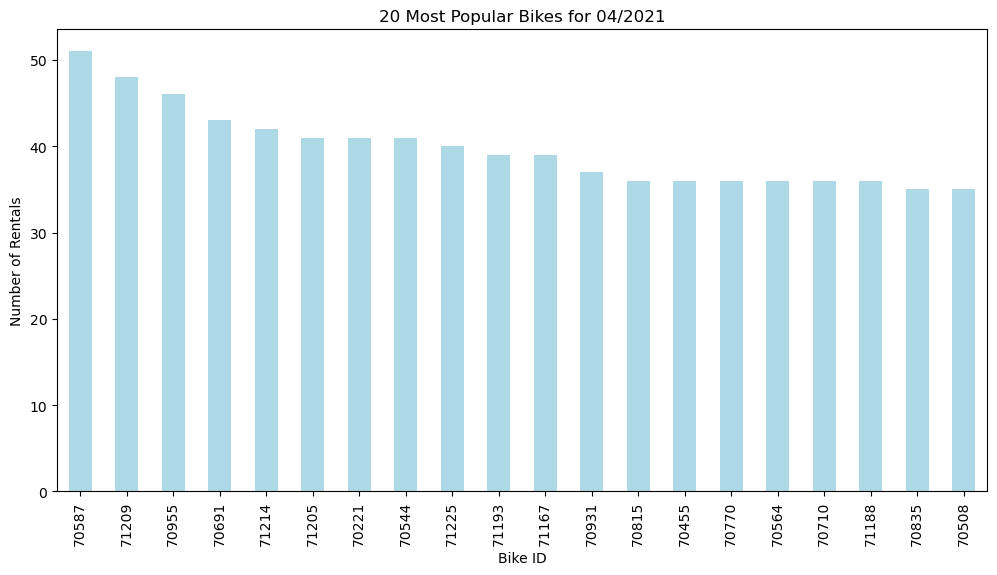

In [203]:
# Filter the data 
filtered_month = df[df['Starttime'].dt.strftime('%m/%Y') == filter_month]

# Group the data by the bikeID and count 
bike_counts = filtered_month['Bikeid'].value_counts().sort_values(ascending=False)

# Select the top 20 bikes
top_bikes = bike_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_bikes.plot(kind='bar', color='lightblue')
plt.title(f"20 Most Popular Bikes for {filter_month}")
plt.xlabel('Bike ID')
plt.ylabel('Number of Rentals')
plt.show()



---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

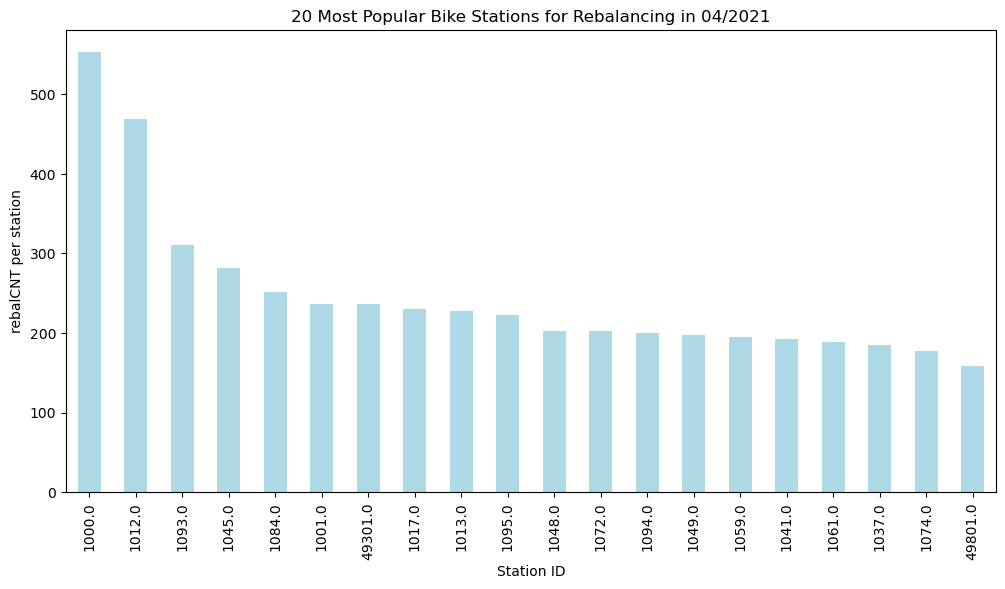

In [204]:
# Filter the Data
rebal_month = df[df['Starttime'].dt.strftime('%m/%Y') == filter_month]

# Count each From station id and select the top 20 most frequent stations
top_stations = rebal_month['From station id'].value_counts().sort_values(ascending=False).head(20)


# Plot a bar chart
plt.figure(figsize=(12, 6))
top_stations.plot(kind='bar', color='lightblue')
plt.title(f"20 Most Popular Bike Stations for Rebalancing in {filter_month}")
plt.xlabel('Station ID')
plt.ylabel('rebalCNT per station')
plt.show()

### Task 3.2

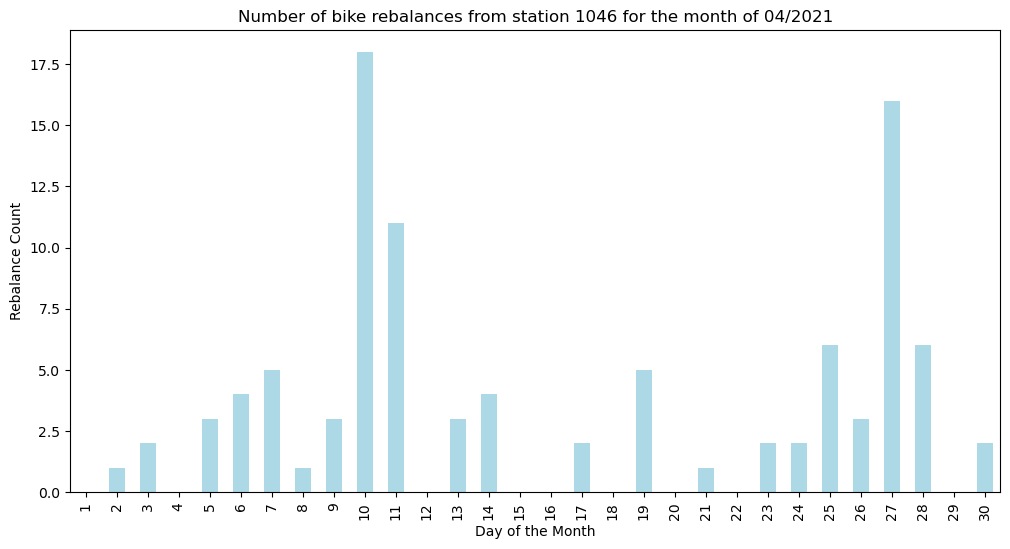

In [206]:
# Filter the data to include only rows for the specified stationID and month
filtered_rebal = df[df['From station id'] == filter_stationID]
filtered_rebal = filtered_rebal[filtered_rebal['Starttime'].dt.strftime('%m/%Y') == filter_month]

# Calculate rebalancing counts for each day
daily_rebal_counts = filtered_rebal['Starttime'].dt.day.value_counts().sort_index()

# Determine the maximum day in the month
max_day = filtered_rebal['Starttime'].dt.days_in_month.max()

# Include missing days and fill them with 0
daily_rebal_counts = daily_rebal_counts.reindex(range(1, max_day + 1), fill_value=0)

# Plot the bar chart
daily_rebal_counts.plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title(f"Number of bike rebalances from station {filter_stationID} for the month of {filter_month}")
plt.xlabel('Day of the Month')
plt.ylabel('Rebalance Count')
plt.show()


---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

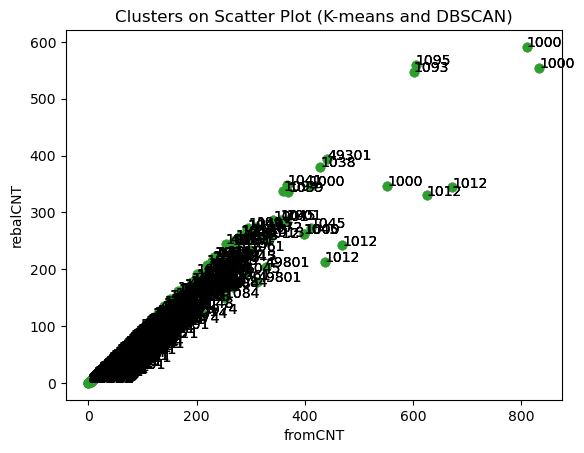

In [214]:
data = monthly_counts[['station_id', 'fromCNT', 'rebalCNT']]

# Set index
data.set_index('station_id', inplace = True)

kmeans_par = [3, 4, 5]
dbscan_par = [(5, 0.5), (10, 1.0), (15, 1.5)]

# Scatter plot for K-means and DBSCAN clustering
for k in kmeans_par:
    
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    labels_kmeans = kmeans.fit_predict(data)
    
for min_samples, eps in dbscan_par:
    
    dbscan = DBSCAN(min_samples = min_samples, eps = eps)
    labels_dbscan = dbscan.fit_predict(data)
    
    # Showing data on scatter plot 
    for i, txt in enumerate(data.index):
       
        plt.annotate(txt, (data['fromCNT'].iloc[i], data['rebalCNT'].iloc[i]))


    plt.scatter(data['fromCNT'], data['rebalCNT'], label = f'K-means, K = {k}', color = 'lightblue')
    plt.scatter(data['fromCNT'], data['rebalCNT'], label = f'DBSCAN, min_samples = {min_samples}, eps = {eps}')

plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('Clusters on Scatter Plot (K-means and DBSCAN)')
plt.show()

### Task 4.2

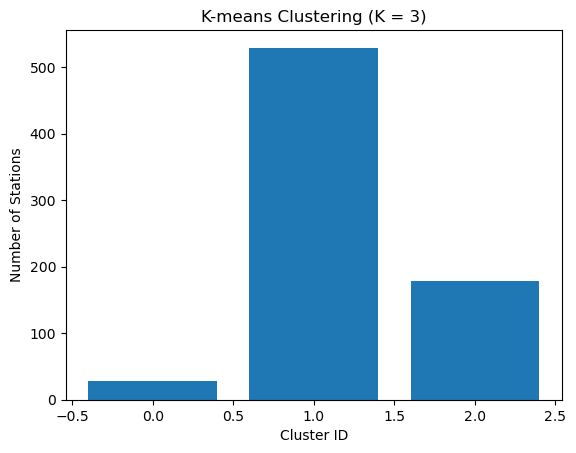

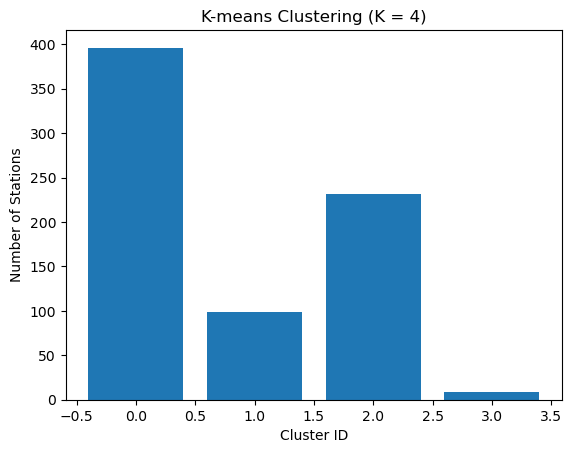

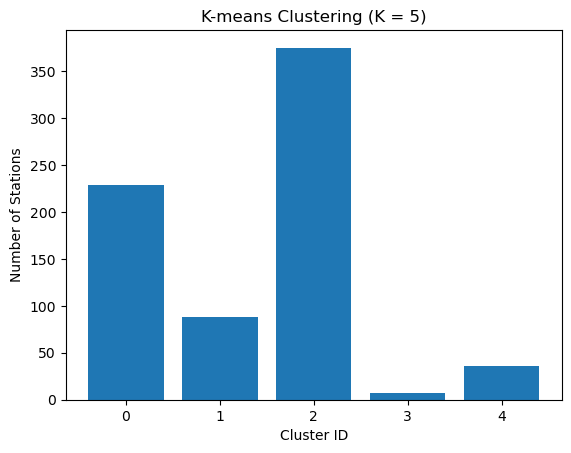

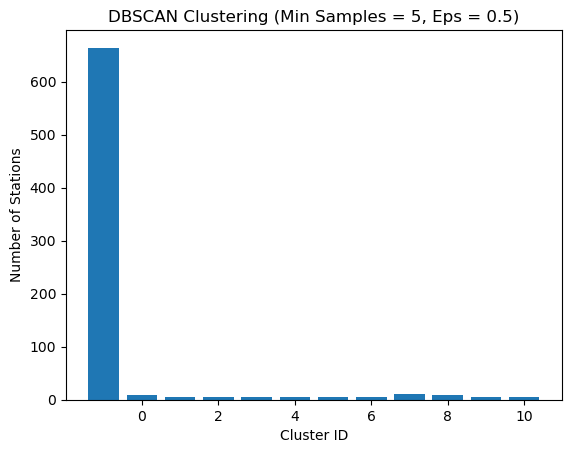

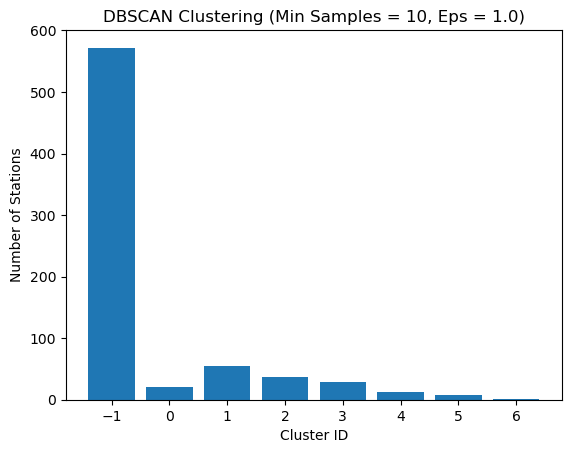

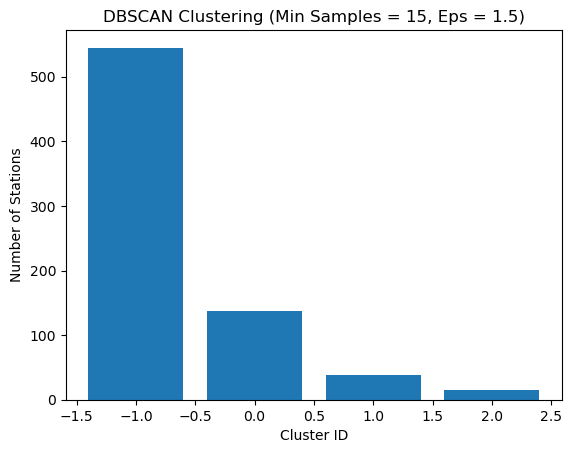

In [218]:
# K-means clustering
for k in kmeans_par:
    
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    labels_kmeans = kmeans.fit_predict(data)
    plot_bar_chart(labels_kmeans, 'K-means', f'K = {k}')

    
# DBSCAN clustering
for min_samples, eps in dbscan_par:

    dbscan = DBSCAN(min_samples = min_samples, eps = eps)
    labels_dbscan = dbscan.fit_predict(data)
    plot_bar_chart(labels_dbscan, 'DBSCAN', f'Min Samples = {min_samples}, Eps = {eps}')

### Task 4.3

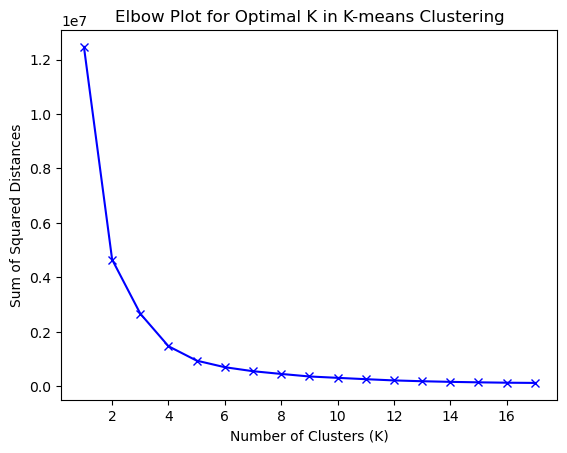

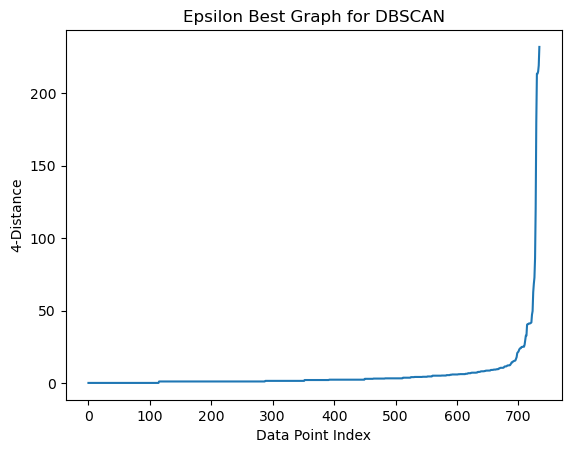

In [241]:
# In utilizing the Elbow method to determine the optimal number of clusters (K) for K-means clustering, I examined a range of K values. 
# The plot of distances against K demonstrated a gradual decline, reaching a point where the rate of decrease slowed down,
# forming an elbow of the plot itself. This method suggested that the optimal K is around 4 or 5, striking a balance between capturing meaningful 
# patterns and avoiding overfitting. The best value of K, considering this balance, was determined to be 4, which is where the elbow really 
# started to decline to 0.

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Elbow plot for K-means clustering
distances = []
ranges = range(1, 18)

for k in ranges:
    
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans = kmeans.fit(data)
    distances.append(kmeans.inertia_)

# Plot the elbow 
plt.plot(ranges, distances, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for Optimal K in K-means Clustering')
plt.show()




# Calculate distances to show best epsilon for 4.4 comparison
k = 4 
neighbor = NearestNeighbors(n_neighbors = k)
distances_dbscan = neighbor.fit(data).kneighbors(data)[0]
sorted_distances = np.sort(distances_dbscan[:, -1])


# Plot the epsilon for DBSCAN
plt.plot(sorted_distances)
plt.xlabel('Data Point Index')
plt.ylabel(f'{k}-Distance')
plt.title('Epsilon Best Graph for DBSCAN')
plt.show()


### Task 4.4

In [ ]:
# The comparison between DBSCAN and K-means plots suggests that K-means is better to use for the data. 
# In the K-means plots, there is a clear separation of clusters, and the distribution of stations per cluster is 
# relatively balanced. On the other hand, the DBSCAN plots, especially with varying epsilon and min_samples, exhibit 
# challenges in forming well structured clusters. The DBSCAN results seem to be more sensitive to changes, leading 
# to less consistent and interpretable clusters. Additionally, the k-means plot showcases a well fitting model with consistency 
# in the line vs the DBSCAN plot of epsilon with a subtle jitter and inconsistent line. Overall, K-means provides 
# a more stable and meaningful clustering solution compared to the DBSCAN model.

